In [15]:
import pandas as pd
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# Using Marks data

In [16]:
marks=pd.read_csv("marks.txt", header=None)
marks=marks.rename(columns={0:"Subject1",1:"Subject2",2:"Result"})
marks.head()

,Subject1,Subject2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [17]:
X=marks.loc[:,['Subject1','Subject2']]
Y=marks.loc[:,'Result']

In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [5]:
regressor=LogisticRegression()
regressor.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
print("a1=",regressor.coef_)
print("a0=",regressor.intercept_)

a1= [[0.03032132 0.03124498]]
a0= [-3.4294559]


In [7]:
Y_pred=regressor.predict(X_test)
print(Y_pred)

[1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1]


In [8]:
score = regressor.score(Y_test,Y_pred)
score

ValueError: Expected 2D array, got 1D array instead:
array=[1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
cm=confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[ 7  1]
 [ 0 12]]


In [10]:
probs=regressor.predict_proba(X_test)
probs

array([[0.40071976, 0.59928024],
       [0.42315594, 0.57684406],
       [0.51616621, 0.48383379],
       [0.51429434, 0.48570566],
       [0.13486256, 0.86513744],
       [0.18539035, 0.81460965],
       [0.42245172, 0.57754828],
       [0.33457637, 0.66542363],
       [0.58626863, 0.41373137],
       [0.35121868, 0.64878132],
       [0.62141171, 0.37858829],
       [0.65379385, 0.34620615],
       [0.56664833, 0.43335167],
       [0.15097318, 0.84902682],
       [0.4255642 , 0.5744358 ],
       [0.33036689, 0.66963311],
       [0.59162222, 0.40837778],
       [0.25192999, 0.74807001],
       [0.42114915, 0.57885085],
       [0.16667003, 0.83332997]])

In [11]:
prob_positive=probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_test, prob_positive)
roc_auc=metrics.auc(fpr, tpr)
print("area under the curve", roc_auc)

area under the curve 0.9895833333333334


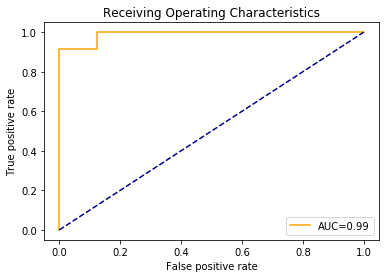

In [12]:
plt.title("Receiving Operating Characteristics")
plt.plot(fpr, tpr, 'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

For plotting a scatter plot

In [13]:
X=marks.iloc[:,:-1]
Y=marks.iloc[:,-1]
admitted=marks.loc[Y==1] #Separating out the Results column having values 1
not_admitted=marks.loc[Y==0] #Separating out the Results column having values 0

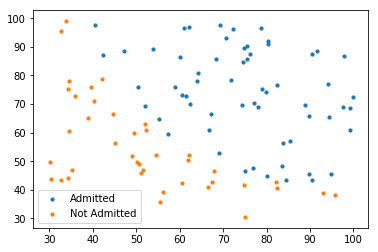

In [14]:
plt.scatter(admitted.iloc[:,0],admitted.iloc[:,1],s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:,0],not_admitted.iloc[:,1],s=10,label='Not Admitted')
plt.legend()
plt.show()


# Using Breast Cancer data

In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
cancer=load_breast_cancer()
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [18]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(cancer.data,cancer.target,test_size=0.3, random_state=0)
cancerclf=LogisticRegression()
cancerclf.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
print("a1=",cancerclf.coef_)
print("a0=",cancerclf.intercept_)

a1= [[ 1.71030868  0.1075281   0.08653647 -0.00666117 -0.12352116 -0.32626484
  -0.5036071  -0.26140792 -0.2451446  -0.02115584  0.04516968  0.96777039
   0.08507219 -0.10526305 -0.00827507  0.00910787 -0.04093047 -0.02923993
  -0.03060043  0.00867052  1.43384767 -0.29081372 -0.25621859 -0.01913376
  -0.21277253 -1.00512078 -1.48396082 -0.53898247 -0.59708219 -0.10647987]]
a0= [0.34711532]


In [21]:
print('Logistic Regression score',cancerclf.score(X_test,Y_test))

Logistic Regression score 0.9649122807017544


In [22]:
Y_pred=cancerclf.predict(X_test)
print(Y_pred)

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


In [23]:
cm=confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix is:", cm, sep='\n')

Confusion Matrix is:
[[ 62   1]
 [  5 103]]


In [24]:
probs=cancerclf.predict_proba(X_test)
probs

array([[9.92878191e-01, 7.12180891e-03],
       [3.12766430e-02, 9.68723357e-01],
       [2.89333490e-03, 9.97106665e-01],
       [2.04062135e-01, 7.95937865e-01],
       [1.07906305e-04, 9.99892094e-01],
       [3.70831951e-03, 9.96291680e-01],
       [9.77419820e-03, 9.90225802e-01],
       [2.13201072e-03, 9.97867989e-01],
       [4.11221970e-02, 9.58877803e-01],
       [3.25615482e-04, 9.99674385e-01],
       [4.95858091e-01, 5.04141909e-01],
       [1.56083311e-01, 8.43916689e-01],
       [5.24199530e-03, 9.94758005e-01],
       [7.73938945e-01, 2.26061055e-01],
       [2.55475129e-01, 7.44524871e-01],
       [9.91080966e-01, 8.91903365e-03],
       [2.16624046e-02, 9.78337595e-01],
       [9.99999996e-01, 4.37954900e-09],
       [9.98287991e-01, 1.71200887e-03],
       [1.00000000e+00, 8.61266952e-12],
       [9.99971636e-01, 2.83644503e-05],
       [9.13270418e-01, 8.67295822e-02],
       [2.17738324e-03, 9.97822617e-01],
       [1.36829868e-02, 9.86317013e-01],
       [9.909652

In [25]:
prob_positive=probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_test, prob_positive)
roc_auc=metrics.auc(fpr, tpr)
print("area under the curve", roc_auc)

area under the curve 0.9961787184009406


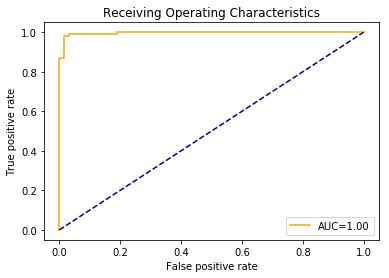

In [26]:
plt.title("Receiving Operating Characteristics")
plt.plot(fpr, tpr, 'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [72]:
import pandas as pd
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [48]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
x = cancer.data
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [52]:
lm = LogisticRegression()
model = lm.fit(x_train,y_train)
pred = model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
accuracy_score(y_test,pred)

0.956140350877193

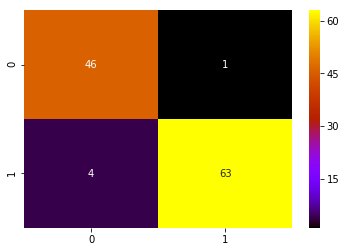

In [59]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,cmap='gnuplot')

In [62]:
from sklearn import metrics
prob = lm.predict_proba(x_test)
proba = prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,proba)
roc_auc = metrics.auc(fpr,tpr)
roc_auc

0.9939663385201651

Text(0.5, 1.0, 'ROC')

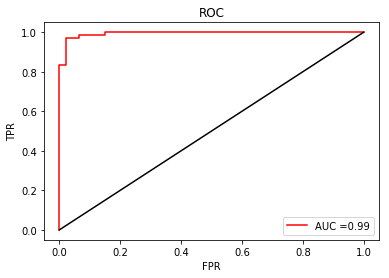

In [68]:
plt.plot(fpr,tpr,color='red',label = 'AUC =%0.2f'%roc_auc)
plt.plot([0,1],[0,1],color='black')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

In [69]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [81]:
x=cancer.data
y=cancer.target

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
from sklearn.svm import SVC
svm = SVC()
model = svm.fit(x_train,y_train)
pred = model.predict(x_test)
pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [84]:
accuracy_score(y_test,pred)

0.6228070175438597